In [10]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [11]:
#Loading data
df=pd.read_csv('C:/Users/helle/Downloads/Python_project/Mall_Customers.xls')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

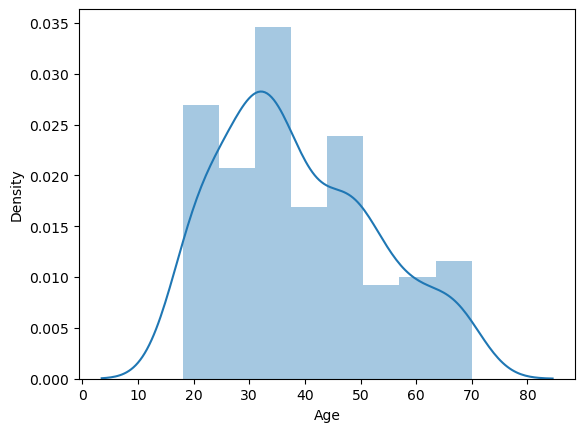

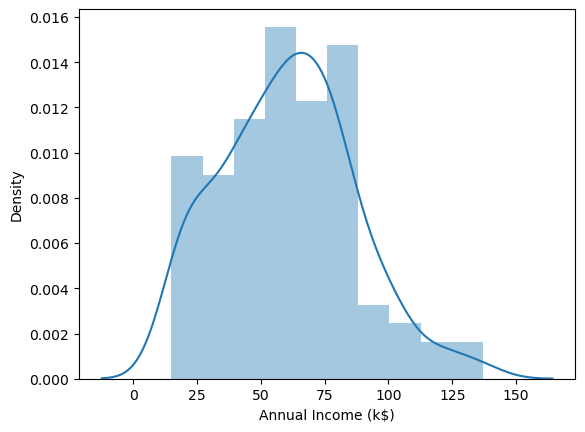

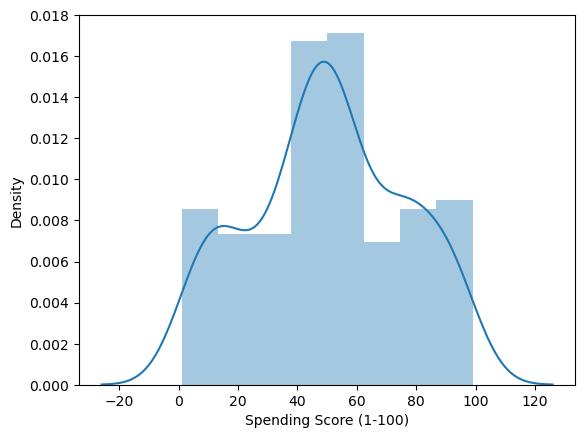

In [5]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

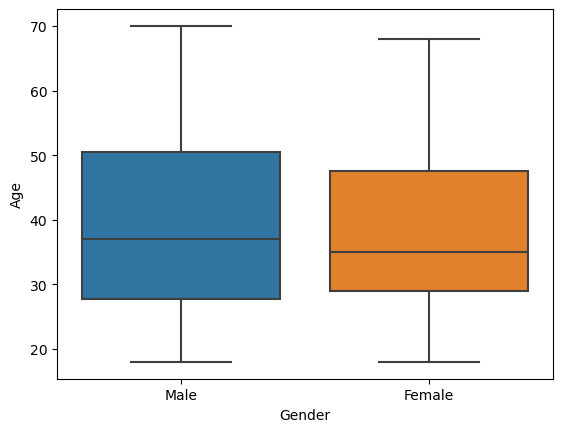

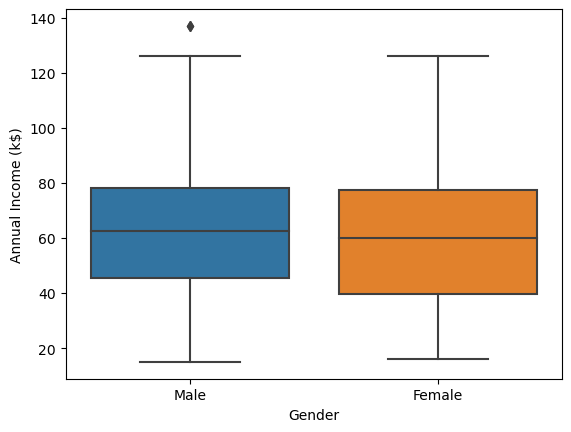

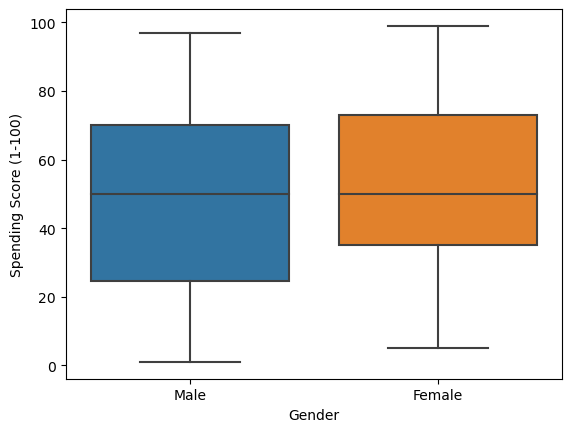

In [18]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df.reset_index(drop=True),x=df[i], fill=True, kind="kde",hue='Gender',rug=True)

In [23]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

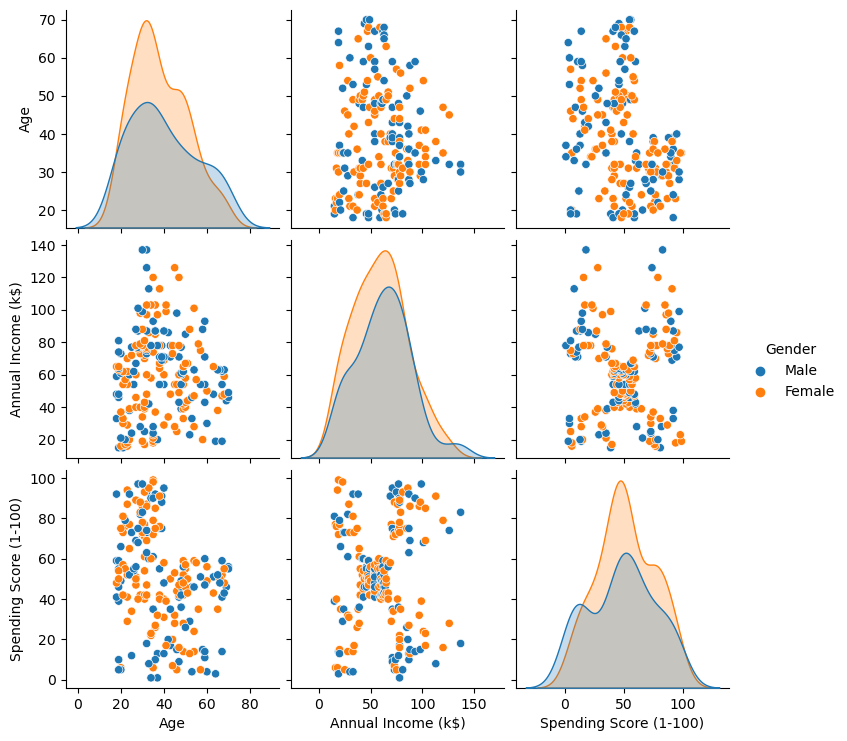

In [25]:
## Bivariate analysis

sns.pairplot(df.drop('CustomerID', axis=1),hue='Gender')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

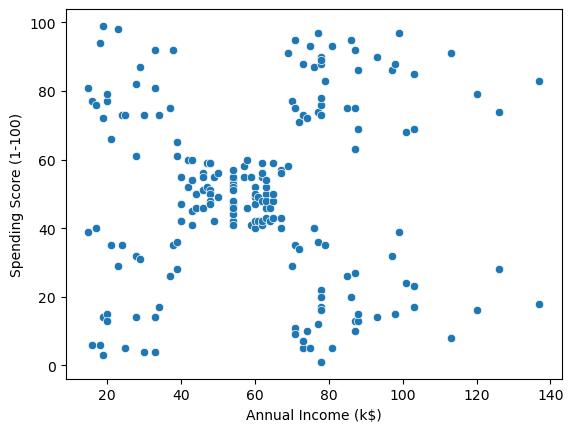

In [27]:
sns.scatterplot(data=df, x = 'Annual Income (k$)', y= 'Spending Score (1-100)')

<Axes: >

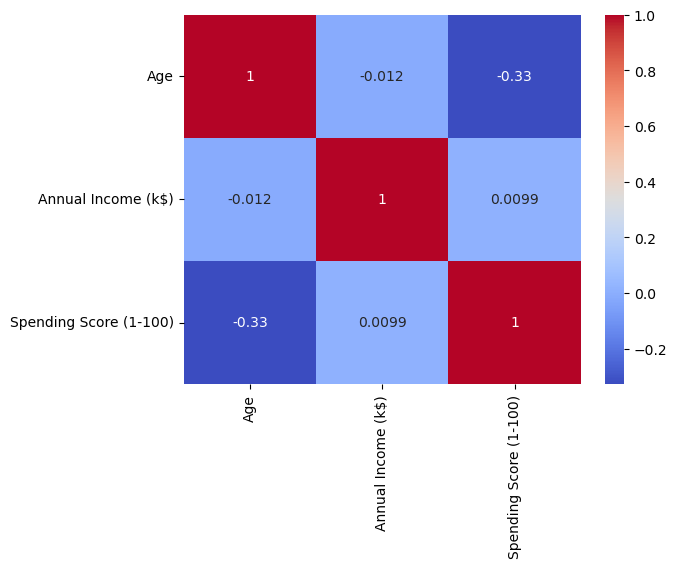

In [30]:
corr = df.drop('CustomerID', axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [32]:
#Bivariate Clustering
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 0, 'No. of clusters')

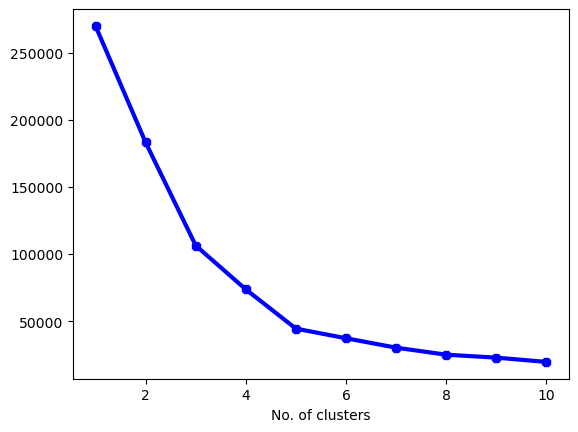

In [33]:
##Elbow method

Errors = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    Errors.append(kmeans.inertia_)
plt.plot(range(1,11), Errors)
plt.plot(range(1,11), Errors, linewidth=3, color='blue', marker='8')
plt.xlabel('No. of clusters')

In [44]:
clustering = KMeans(n_clusters = 5)
clustering.fit(df1)
y=clustering.predict(df1)
df1['Spending and Income Cluster']= y
df1.head()

,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

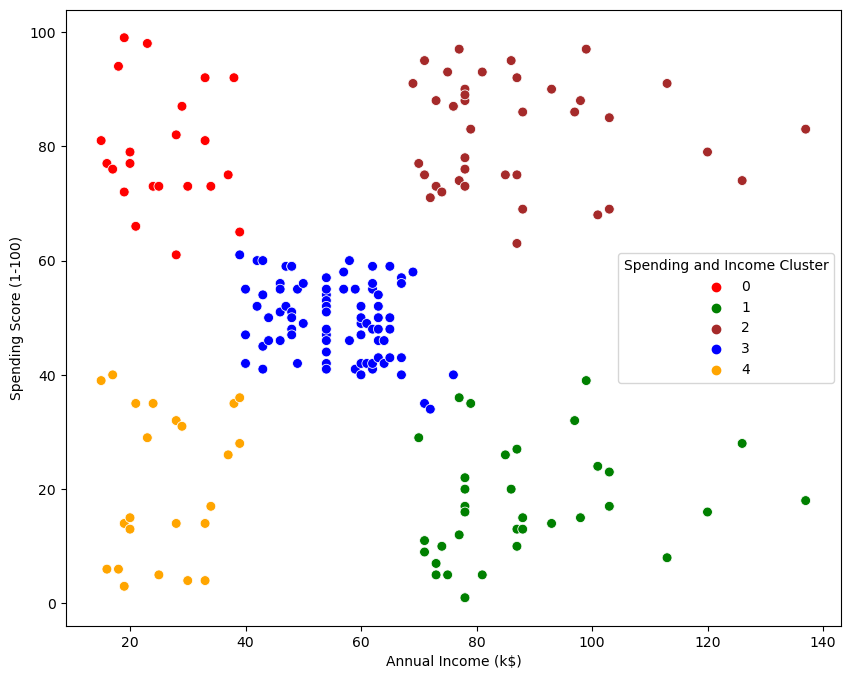

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Spending and Income Cluster', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

In [29]:
pd.crosstab(df1['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.538462,0.461538
3,0.592593,0.407407
4,0.608696,0.391304


In [11]:
df2=df2.drop('Gender_Male', axis=1)

In [6]:
##Multivariate clustering
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


Text(0.5, 0, 'No. of clusters')

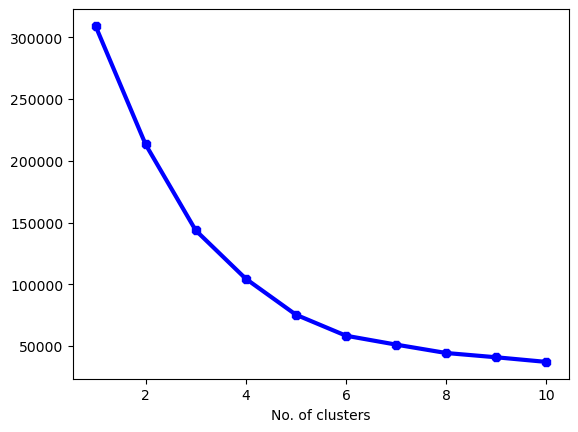

In [17]:
Errors = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    Errors.append(kmeans.inertia_)
plt.plot(range(1,11), Errors)
plt.plot(range(1,11), Errors, linewidth=3, color='blue', marker='8')
plt.xlabel('No. of clusters')

In [16]:
clustering = KMeans(n_clusters = 5)
clustering.fit(df2)
y=clustering.predict(df2)
df2['Spending, Income and Age Cluster']= y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,"Spending, Income and Age Cluster"
0,15,39,19,3
1,15,81,21,0
2,16,6,20,3
3,16,77,23,0
4,17,40,31,3


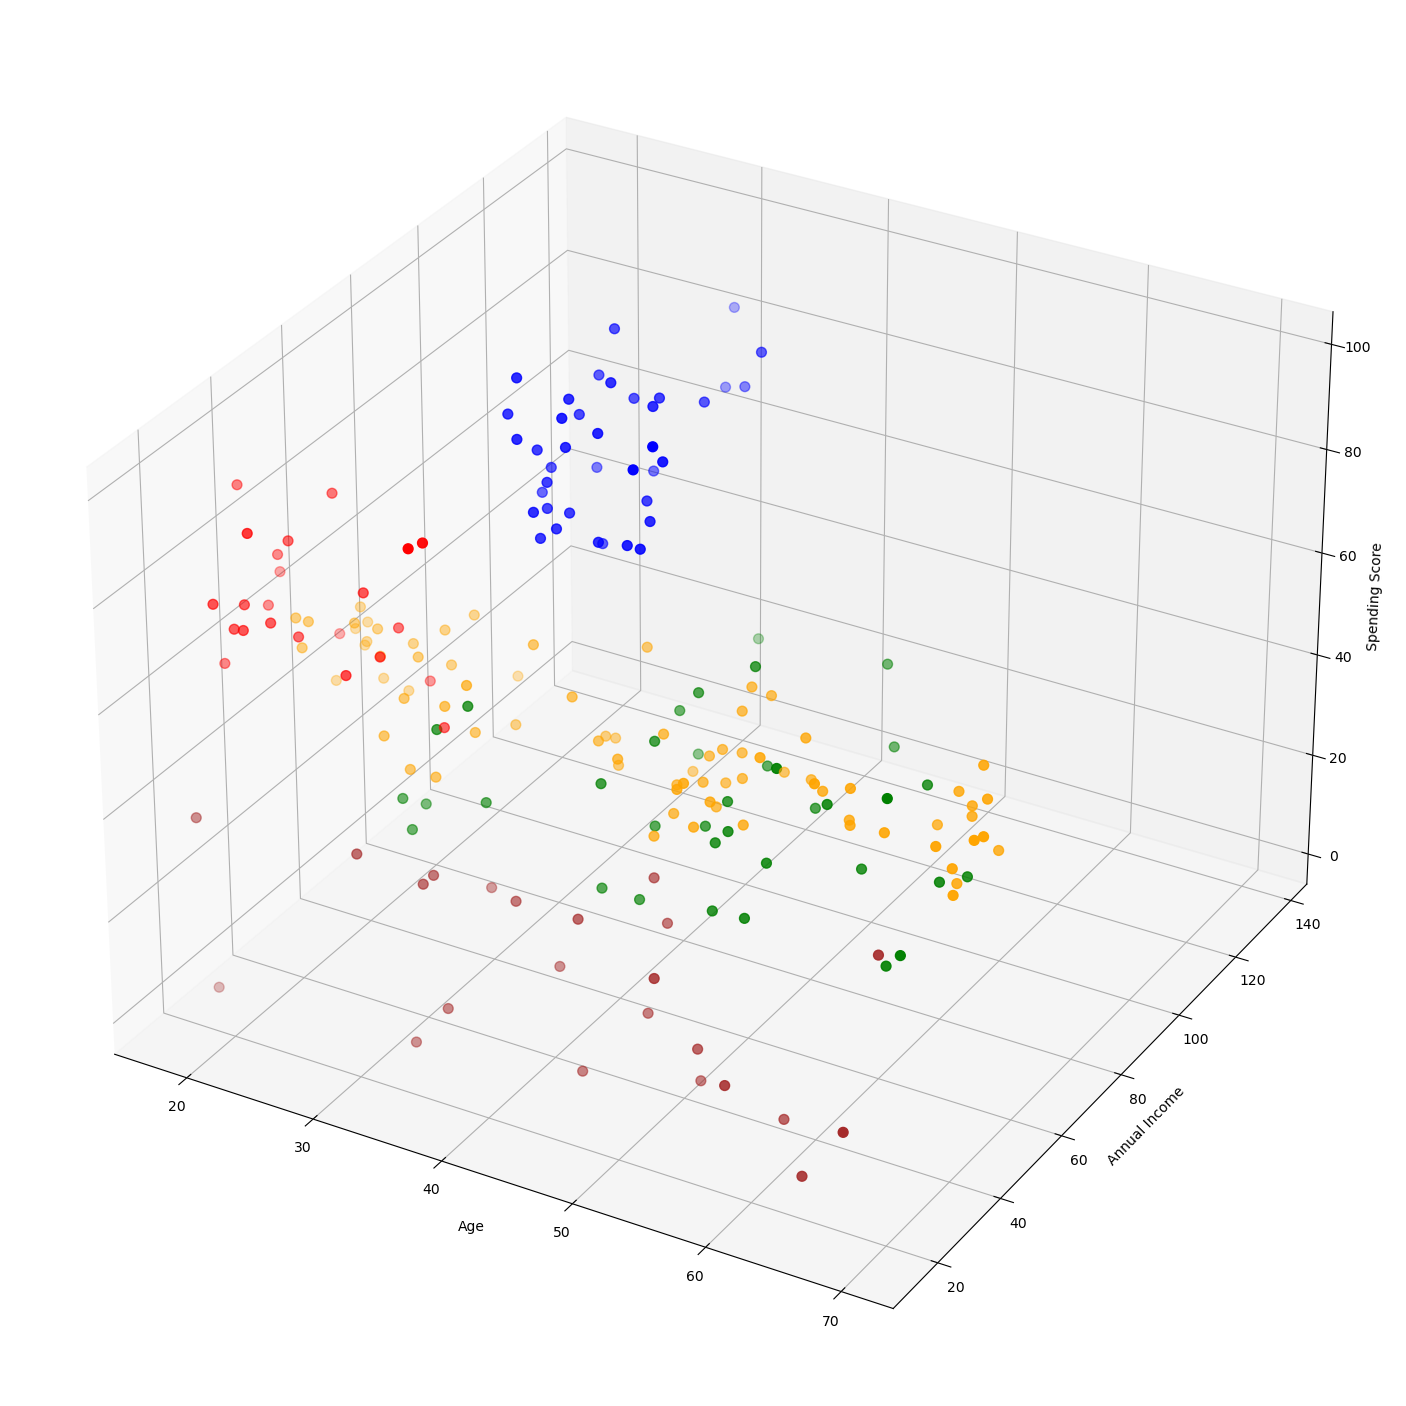

In [28]:
# 3d scatter plot
fig = plt.figure(figsize=(25,18))
ax = fig.add_subplot(111, projection= '3d')


ax.scatter(df2['Age'][df2['Spending, Income and Age Cluster']==0], df2['Annual Income (k$)'][df2['Spending, Income and Age Cluster']==0], df2['Spending Score (1-100)'][df2['Spending, Income and Age Cluster']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Spending, Income and Age Cluster']==1], df2['Annual Income (k$)'][df2['Spending, Income and Age Cluster']==1], df2['Spending Score (1-100)'][df2['Spending, Income and Age Cluster']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Spending, Income and Age Cluster']==2], df2['Annual Income (k$)'][df2['Spending, Income and Age Cluster']==2], df2['Spending Score (1-100)'][df2['Spending, Income and Age Cluster']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Spending, Income and Age Cluster']==3], df2['Annual Income (k$)'][df2['Spending, Income and Age Cluster']==3], df2['Spending Score (1-100)'][df2['Spending, Income and Age Cluster']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Spending, Income and Age Cluster']==4], df2['Annual Income (k$)'][df2['Spending, Income and Age Cluster']==4], df2['Spending Score (1-100)'][df2['Spending, Income and Age Cluster']==4], c='orange', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [48]:
df_new = pd.concat([df, df1['Spending and Income Cluster'], df2['Spending, Income and Age Cluster']], axis=1)
df_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster,"Spending, Income and Age Cluster"
0,1,Male,19,15,39,4,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,3


In [49]:
df_new.to_csv('Clustered_data.csv')